<a href="https://colab.research.google.com/github/hsabaghpour/pytorch-training-playground/blob/main/Basic_NN_creation_on_PyThorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Basic NN on IRIS dataset**


**About Dataset**

The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:



**SepalLengthCm**

**SepalWidthCm**

**PetalLengthCm**

**PetalWidthCm**

**Species**

https://www.kaggle.com/datasets/uciml/iris

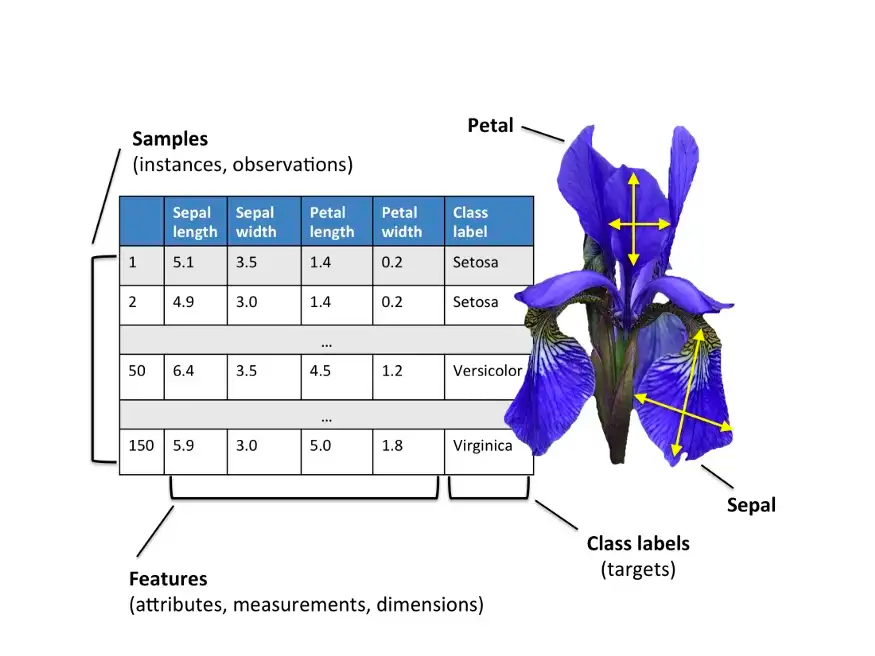